## Importing libraries

In [ ]:
import numpy as np
import random
import pandas
import re
import cv2

## Class definition

In [ ]:
class Room:
  objects = ["table", "chair", "door"]
  def __init__(self, size):
    self.matrix = np.zeros(size, dtype=int)
    self.text = []
    self.objectsCount = {}

  def addObject(self, objectName: str, objectSize: int, position: str):

    objectValue = self.objects.index(objectName) + 1

    if not objectName in self.objectsCount:
      self.objectsCount[objectName] = {
          "count": 1,
          "positions": [position]
      }
    else:
      self.objectsCount[objectName]["count"] += 1
      self.objectsCount[objectName]["positions"].append(position)

    size_str = ""
    if objectSize == 1:
      size_str = "small"
    elif objectSize == 2:
      size_str = "medium"
    elif objectSize == 3:
      size_str = "big"
    else:
      size_str = "very big"

    submatrix_size = objectSize
    submatrix_row = None
    submatrix_column = None

    if "center" in position or "middle" in position:
      submatrix_row = (self.matrix.shape[0] - objectSize) // 2
    if "top" in position or "up" in position:
      submatrix_row = 0
    if "bottom" in position or "down" in position:
      submatrix_row = (self.matrix.shape[0] - objectSize)

    if "center" in position or "middle" in position:
      submatrix_column = (self.matrix.shape[1] - objectSize) // 2
    if "left" in position:
      submatrix_column = 0
    if "right" in position:
      submatrix_column = (self.matrix.shape[1] - objectSize)

    #print(f"{submatrix_row}:{submatrix_row+submatrix_size}, {submatrix_column}:{submatrix_column+submatrix_size}")

    self.matrix[submatrix_row : submatrix_row + submatrix_size,
               submatrix_column : submatrix_column + submatrix_size] = np.full((submatrix_size, submatrix_size), objectValue)

    # if self.text == "":
    #   self.text = "A " + size_str + " " + objectName + " at " + position
    # else:
    #   self.text = self.text.replace(" and a", ",")
    #   self.text = self.text + " and a " + size_str + " " + objectName + " at " + position


  def generateText(self):
    self.text = []
    # Modo lista
    text = "There "
    if len(self.objectsCount.values()) > 1 or list(self.objectsCount.values())[0]["count"] > 1:
      text += "are "
    else:
      text += "is "

    for roomObject in self.objectsCount:
      if roomObject == list(self.objectsCount.keys())[-1]:
        text = text[:-2]
        text += " and "
      text += (str(self.objectsCount[roomObject]["count"]) + " ") if (self.objectsCount[roomObject]["count"] > 1) else "a "
      text += roomObject + ("s at " if (self.objectsCount[roomObject]["count"] > 1) else " at ")
      for position in self.objectsCount[roomObject]["positions"]:
        text += position + ", "
    text = text[:-2]
    self.text.append(text)

    # Relación centro-bordes-esquinas
    text = ""
    corners_count = 0
    corners_objects = []
    center_count = 0
    center_objects = []
    edges_count = 0
    edges_objects = []
    for roomObject in self.objectsCount:
      # print(roomObject, " -> ", self.objectsCount[roomObject])
      for position in self.objectsCount[roomObject]["positions"]:
        if "center" not in position:
          corners_count += 1
          if not roomObject in corners_objects and not (roomObject + "s") in corners_objects:
            corners_objects.append(roomObject)
          elif roomObject in corners_objects:
            corners_objects[corners_objects.index(roomObject)] += "s"
        elif position == "center":
          center_count += 1
          if not roomObject in center_objects and not (roomObject + "s") in center_objects:
            center_objects.append(roomObject)
          elif roomObject in center_objects:
            center_objects[center_objects.index(roomObject)] += "s"
        else:
          edges_count += 1
          if not roomObject in edges_objects and not (roomObject + "s") in edges_objects:
            edges_objects.append(roomObject)
          elif roomObject in edges_objects:
            edges_objects[edges_objects.index(roomObject)] += "s"
    text += "Some "
    # print(center_count, corners_count, edges_count)
    if corners_count > 0:
      for roomObject in corners_objects:
        text += roomObject + ", "
      text = text[:-2]
      # Cambia la ultima coma por un and
      text = re.sub(r',\s*([^,]+)$', r' and \1', text)
      text += " are located in the corners"
      if edges_count > 0:
        if center_count == 0:
          text += " and some "
        else:
          text += ", some "
        for roomObject in edges_objects:
          text += roomObject + ", "
        text = text[:-2]
        if edges_count > 1:
          text = re.sub(r',\s*([^,]+)$', r' and \1', text)
        text += " at the edges "
      if center_count > 0:
        text += "and some "
        for roomObject in center_objects:
          text += roomObject + ", "
        text = text[:-2]
        if center_count > 1:
          text = re.sub(r',\s*([^,]+)$', r' and \1', text)
        text += " in the center"
    elif edges_count > 0:
      for roomObject in edges_objects:
        text += roomObject + ", "
      text = text[:-2]
      text = re.sub(r',\s*([^,]+)$', r' and \1', text)
      text += " are located at the edges"
      if corners_count > 0:
        if center_count == 0:
          text += " and some "
        else:
          text += ", some "
        for roomObject in corners_objects:
          text += roomObject + ", "
        text = text[:-2]
        if corners_count > 1:
          text = re.sub(r',\s*([^,]+)$', r' and \1', text)
        text += " in the corners "
      if center_count > 0:
        text += "and some "
        for roomObject in center_objects:
          text += roomObject + ", "
        text = text[:-2]
        if center_count > 1:
          text = re.sub(r',\s*([^,]+)$', r' and \1', text)
        text += " at the center"
    elif center_count > 0:
      for roomObject in center_objects:
        text += roomObject + ", "
      text = text[:-2]
      text = re.sub(r',\s*([^,]+)$', r' and \1', text)
      text += " are located in the center"
      if edges_count > 0:
        if center_count == 0:
          text += " and some "
        else:
          text += ", some "
        for roomObject in edges_objects:
          text += roomObject + ", "
        text = text[:-2]
        if edges_count > 1:
          text = re.sub(r',\s*([^,]+)$', r' and \1', text)
        text += " at the edges"
      if center_count > 0:
        text += " and some "
        for roomObject in corners_objects:
          text += roomObject + ", "
        text = text[:-2]
        if corners_count > 1:
          text = re.sub(r',\s*([^,]+)$', r' and \1', text)
        text += " in the corners"
    self.text.append(text)

    # A pares (una silla en frente de otra, etc)
    text = ""


  def generateImage(self):
    # Normalize
    imageMatrix = (self.matrix / np.max(self.matrix) * 255).astype(np.uint8)
    color_map = cv2.applyColorMap(imageMatrix, cv2.COLORMAP_JET)
    color_map = cv2.resize(color_map, (200, 200), interpolation=cv2.INTER_NEAREST)
    return color_map

## Test

In [ ]:
room1 = Room((15, 15))
room1.matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
room1.addObject("chair", 2, "bottom_right")
room1.addObject("chair", 2, "center_top")
room1.addObject("chair", 2, "center_left")
room1.addObject("chair", 2, "center_right")
room1.addObject("door", 1, "bottom_left")
room1.addObject("door", 1, "bottom_center")
room1.addObject("table", 5, "center")
room1.addObject("table", 3, "top_left")
room1.addObject("table", 2, "top_right")

print(room1.matrix, "\n")
room1.generateText()
print(room1.text)

[[1 1 1 0 0 0 2 2 0 0 0 0 0 1 1]
 [1 1 1 0 0 0 2 2 0 0 0 0 0 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [2 2 0 0 0 1 1 1 1 1 0 0 0 2 2]
 [2 2 0 0 0 1 1 1 1 1 0 0 0 2 2]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 2]
 [3 0 0 0 0 0 0 3 0 0 0 0 0 2 2]] 

['There are 4 chairs at bottom_right, center_top, center_left, center_right, 2 doors at bottom_left, bottom_center and 3 tables at center, top_left, top_right', 'Some chair, door and tables are located in the corners, some chairs and door at the edges and some table in the center']


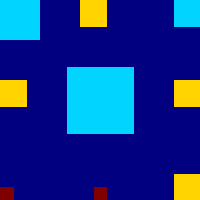

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(room1.generateImage())

## Repetición en bucle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ruta_base = "/content/drive/MyDrive/CUARTO/TFG Pablo Pérez González. Videojuegos/data"


Mounted at /content/drive


In [ ]:
database_size = 30
room_size = (15, 15)
limit_of_elements = (2, 7)
elements_types = len(Room.objects)
positions = [
    "top_left", "center_top", "top_right",
    "center_left", "center", "center_right",
    "bottom_left", "center_bottom", "bottom_right"
]

all_rooms = []

for i in range(database_size):
  room = Room(room_size)
  number_elements = random.randint(limit_of_elements[0], limit_of_elements[1])
  for i in range(number_elements):
    element = random.randint(0, elements_types -1)
    size = random.randint(1, int(min(room_size) / 2))
    position = positions[random.randint(0, len(positions)-1)]
    room.addObject(Room.objects[element], size, position)
  room.generateText()
  all_rooms.append(room)
  # print(room.matrix, "\n")
  ruta_imagen_drive = ruta_base + "/room_" + str(i) + ".jpg"
  cv2.imwrite(ruta_imagen_drive, room.generateImage())
  ruta_text_drive = ruta_base + "/room_" + str(i) + ".txt"
  with open(ruta_text_drive , 'w', encoding="utf-8") as file:
    file.write("\n".join(room.text))
